In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib_inline.backend_inline import set_matplotlib_formats
from matplotlib import cm
from cycler import cycler
set_matplotlib_formats('svg')
plt.rc('legend', frameon=False)

### Problem 2

Created a .txt file with the exact solution to the Poisson equation, over 100 possible values of $x$. Now to plot it, I just need to read the contents of the file and plot them with matplotlib.

In [2]:
u_x = pd.read_csv('u_x.txt', sep = '  ', 
                engine = 'python', names = ['x', 'u(x)'], index_col = 0)
u_x.iloc[0:10]

u(x)
x             
0.00  0.000000
0.01  0.085163
0.02  0.161270
0.03  0.229180
0.04  0.289680
0.05  0.343470
0.06  0.391190
0.07  0.433420
0.08  0.470670
0.09  0.503430

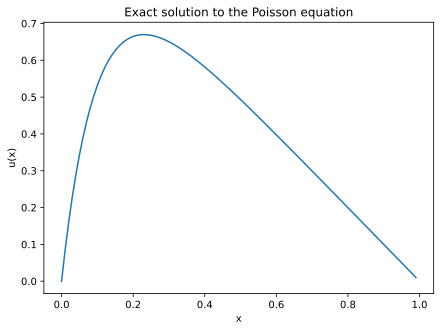

In [3]:
plt.figure(figsize = (7, 5))
plt.plot(u_x)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Exact solution to the Poisson equation')
plt.savefig('u_x.pdf')
plt.show()

### Problem 7

Make a plot that compares the numeric solution for different values of $n$ with the exact solution for $u(x)$ from problem 2.

In [4]:
#import all the different files for different values of n
v_10 = pd.read_csv('v_x_10.txt', sep = '  ', engine = 'python', names = ['x', 'v(x)'], index_col = 0)
v_100 = pd.read_csv('v_x_100.txt', sep = '  ', engine = 'python', names = ['x', 'v(x)'], index_col = 0)
v_1000 = pd.read_csv('v_x_1000.txt', sep = '  ', engine = 'python', names = ['x', 'v(x)'], index_col = 0)
v_10000 = pd.read_csv('v_x_10000.txt', sep = '  ', engine = 'python', names = ['x', 'v(x)'], index_col = 0)
v_100000 = pd.read_csv('v_x_100000.txt', sep = '  ', engine = 'python', names = ['x', 'v(x)'], index_col = 0)
v_1000000 = pd.read_csv('v_x_1000000.txt', sep = '  ', engine = 'python', names = ['x', 'v(x)'], index_col = 0)
v_10000000 = pd.read_csv('v_x_10000000.txt', sep = '  ', engine = 'python', names = ['x', 'v(x)'], index_col = 0)

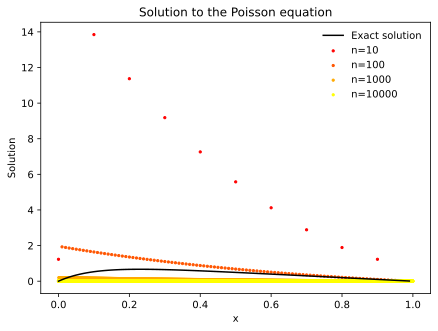

In [5]:
#plot
#first copy the plot from problem 2
#then plot the numeric solutions on top of it
fig, ax = plt.subplots(figsize = (7, 5))
custom_cycler = cycler("color", cm.autumn(np.linspace(0, 1, 4)))
ax.set_prop_cycle(custom_cycler)
ax.plot(u_x.index, u_x["u(x)"], 'k', label = "Exact solution")
ax.scatter(v_10.index, v_10["v(x)"], 5, label = "n=10")
ax.scatter(v_100.index, v_100["v(x)"], 5, label = "n=100")
ax.scatter(v_1000.index, v_1000["v(x)"], 5, label = "n=1000")
ax.scatter(v_10000.index, v_10000["v(x)"], 5, label = "n=10000")
ax.set_xlabel('x')
ax.set_ylabel('Solution')
ax.set_title('Solution to the Poisson equation')
ax.legend()
plt.savefig('v_x.pdf')
plt.show()

### Problem 8a
Plot the logarithm of the absolute error $\log_{10}(\Delta_i) = \log_{10}(|u_i - v_i|)$ as a function of $x_i$. Show different choices of $n$ in the same plot.

In [6]:
#make a quick function so I can find u for specific x values
def u(x):
    return (1 - (1 - np.exp(-10))*x - np.exp(-10*x))

#initialize x arrays
x_10 = np.array(v_10.index)
x_100 = np.array(v_100.index)
x_1000 = np.array(v_1000.index)
x_10000 = np.array(v_10000.index)

#find absolute errors
err_10 = np.abs(u(x_10) - np.array(v_10["v(x)"]))
err_100 = np.abs(u(x_100) - np.array(v_100["v(x)"]))
err_1000 = np.abs(u(x_1000) - np.array(v_1000["v(x)"]))
err_10000 = np.abs(u(x_10000) - np.array(v_10000["v(x)"]))

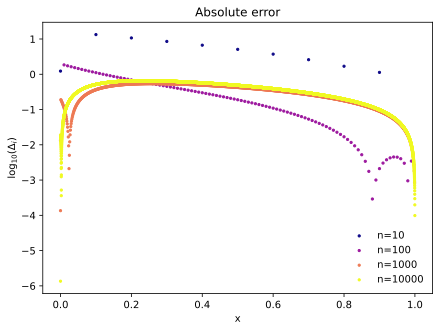

In [7]:
#plot on a log scale
fig, ax = plt.subplots(figsize = (7, 5))
custom_cycler = cycler("color", cm.plasma(np.linspace(0, 1, 4)))
ax.set_prop_cycle(custom_cycler)
ax.scatter(x_10, np.log10(err_10), 5, label = "n=10")
ax.scatter(x_100, np.log10(err_100), 5, label = "n=100")
ax.scatter(x_1000, np.log10(err_1000), 5, label = "n=1000")
ax.scatter(x_10000, np.log10(err_10000), 5, label = "n=10000")
ax.set_xlabel("x")
ax.set_ylabel(r"$\log_{10}(\Delta_i)$")
ax.set_title("Absolute error")
ax.legend()
plt.savefig("err_abs.pdf")
plt.show()

### Problem 8b
Plot the logarithm of the relative error $\log_{10}(\epsilon_i) = \log_{10}\left(\left|\frac{u_i - v_i}{u_i}\right|\right)$.

In [8]:
#initialize some more x arrays
#this is for 8c but I might as well calculate all the relative errors at once
x_100000 = np.array(v_100000.index)
x_1000000 = np.array(v_1000000.index)
x_10000000 = np.array(v_10000000.index)

#find errors
#the big long divide is to get rid of divide by zero errors
relerr_10 = np.abs(np.divide(u(x_10) - np.array(v_10["v(x)"]), u(x_10), out = np.ones(len(x_10))*np.nan, where = u(x_10) != 0))
relerr_100 = np.abs(np.divide(u(x_100) - np.array(v_100["v(x)"]), u(x_100), out = np.ones(len(x_100))*np.nan, where = u(x_100) != 0))
relerr_1000 = np.abs(np.divide(u(x_1000) - np.array(v_1000["v(x)"]), u(x_1000), out = np.ones(len(x_1000))*np.nan, where = u(x_1000) != 0))
relerr_10000 = np.abs(np.divide(u(x_10000) - np.array(v_10000["v(x)"]), u(x_10000), out = np.ones(len(x_10000))*np.nan, where = u(x_10000) != 0))
relerr_100000 = np.abs(np.divide(u(x_100000) - np.array(v_100000["v(x)"]), u(x_100000), out = np.ones(len(x_100000))*np.nan, where = u(x_100000) != 0))
relerr_1000000 = np.abs(np.divide(u(x_1000000) - np.array(v_1000000["v(x)"]), u(x_1000000), out = np.ones(len(x_1000000))*np.nan, where = u(x_1000000) != 0))
relerr_10000000 = np.abs(np.divide(u(x_10000000) - np.array(v_10000000["v(x)"]), u(x_10000000), out = np.ones(len(x_10000000))*np.nan, where = u(x_10000000) != 0))

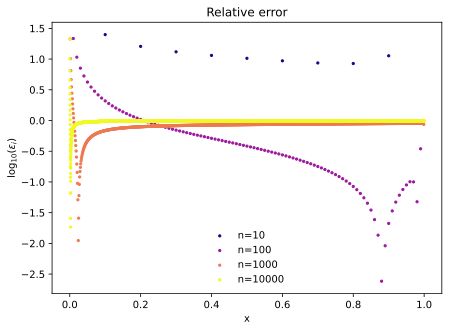

In [9]:
#plot
fig, ax = plt.subplots(figsize = (7, 5))
custom_cycler = cycler("color", cm.plasma(np.linspace(0, 1, 4)))
ax.set_prop_cycle(custom_cycler)
ax.scatter(x_10, np.log10(relerr_10), 5, label = "n=10")
ax.scatter(x_100, np.log10(relerr_100), 5, label = "n=100")
ax.scatter(x_1000, np.log10(relerr_1000), 5, label = "n=1000")
ax.scatter(x_10000, np.log10(relerr_10000), 5, label = "n=10000")
ax.set_xlabel("x")
ax.set_ylabel(r"$\log_{10}(\epsilon_i)$")
ax.set_title("Relative error")
ax.legend()
plt.savefig("err_rel.pdf")
plt.show()

### Problem 8c
Now make a table that shows the maximum relative error $\max(\epsilon_i)$ for each choice of $n$, up to $n=10^7$. Feel free to also make a plot to visualize this. Comment on your result.

In [10]:
#find the maximum relative errors
maxerr_10 = np.nanmax(relerr_10)
maxerr_100 = np.nanmax(relerr_100)
maxerr_1000 = np.nanmax(relerr_1000)
maxerr_10000 = np.nanmax(relerr_10000)
maxerr_100000 = np.nanmax(relerr_10000)
maxerr_1000000 = np.nanmax(relerr_1000000)
maxerr_10000000 = np.nanmax(relerr_10000000)

n = 10**(np.arange(1, 8))
maxerr = np.array([maxerr_10, maxerr_100, maxerr_1000, maxerr_10000,
                   maxerr_100000, maxerr_1000000, maxerr_10000000])
df = pd.DataFrame(maxerr, n)
df

0
10        2.502208e+01
100       2.162836e+01
1000      2.126316e+01
10000     2.122668e+01
100000    2.122668e+01
1000000   6.017926e+07
10000000  8.160720e+06

### Problem 9c
Implement the special algorithm.

In [11]:
#import all the different files for different values of n
sv_10 = pd.read_csv('sv_x_10.txt', sep = '  ', engine = 'python', names = ['x', 'v(x)'], index_col = 0)
sv_100 = pd.read_csv('sv_x_100.txt', sep = '  ', engine = 'python', names = ['x', 'v(x)'], index_col = 0)
sv_1000 = pd.read_csv('sv_x_1000.txt', sep = '  ', engine = 'python', names = ['x', 'v(x)'], index_col = 0)
sv_10000 = pd.read_csv('sv_x_10000.txt', sep = '  ', engine = 'python', names = ['x', 'v(x)'], index_col = 0)

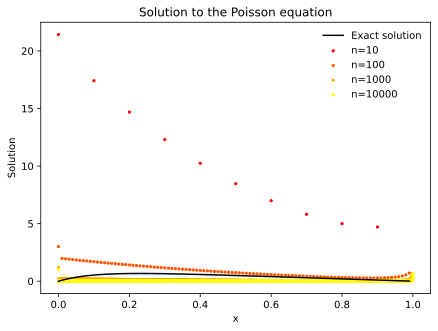

In [12]:
#plot
#first copy the plot from problem 2
#then plot the numeric solutions on top of it
fig, ax = plt.subplots(figsize = (7, 5))
custom_cycler = cycler("color", cm.autumn(np.linspace(0, 1, 4)))
ax.set_prop_cycle(custom_cycler)
ax.plot(u_x.index, u_x["u(x)"], 'k', label = "Exact solution")
ax.scatter(sv_10.index, sv_10["v(x)"], 5, label = "n=10")
ax.scatter(sv_100.index, sv_100["v(x)"], 5, label = "n=100")
ax.scatter(sv_1000.index, sv_1000["v(x)"], 5, label = "n=1000")
ax.scatter(sv_10000.index, sv_10000["v(x)"], 5, label = "n=10000")
ax.set_xlabel('x')
ax.set_ylabel('Solution')
ax.set_title('Solution to the Poisson equation')
ax.legend()
plt.savefig('sv_x.pdf')
plt.show()

### Problem 10
Time the general and special algorithms for various step sizes.

In [13]:
timing = pd.read_csv('timing.txt', sep = ' ', 
                engine = 'python', names = ['n', 'general', 'special'])

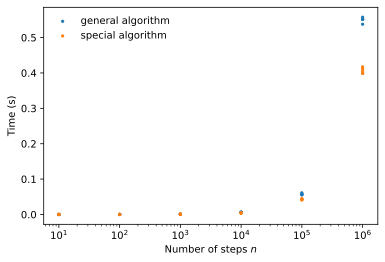

In [14]:
plt.scatter(timing["n"], timing["general"], 5, label = "general algorithm")
plt.scatter(timing["n"], timing["special"], 5, label = "special algorithm")
plt.xscale("log")
plt.xlabel(r"Number of steps $n$")
plt.ylabel("Time (s)")
plt.legend()
plt.savefig("timing.pdf")
plt.show()